# Ejercicio 3 - TP1 Metodos Computaciones
### Camila Cauzzo y Catalina Dolhare

Importamos las clases del archivo de matricesRala para tener acceso a estos metodos 

In [1]:
from matricesRalas import *


Creamos las matrices correspondientes para W y D

In [2]:
W = MatrizRala(11, 11)

''' A = 0
    B = 1
    C = 2
    D = 3
    E = 4
    F = 5
    G = 6
    H = 7
    I = 8
    J = 9
    K = 10
'''

W[1, 0] = 1 #A cita a B
W[5, 0] = 1 #A cita a F
W[6, 0] = 1 #A cita a G
W[0, 2] = 1 #C cita a A
W[0, 3] = 1 #D cita a A
W[0, 4] = 1 #E cita a A
W[8, 5] = 1 #F cita a I
W[5, 6] = 1 #G cita a F
W[6, 7] = 1 #H cita a G
W[6, 8] = 1 #I cita a G
W[7, 8] = 1 #I cita a H
W[9, 8] = 1 #I cita a J
W[4, 10] = 1 #K cita a E

D = MatrizRala(11, 11)
D[0, 0] = 1/3
D[2, 2] = 1
D[3, 3] = 1
D[4, 4] = 1
D[5, 5] = 1
D[6, 6] = 1
D[7, 7] = 1
D[8, 8] = 1/3
D[10, 10] = 1

Si el sistema converge, encontramos el vector de probabilidad p* tal que:

p* = (1-d)/N*(vector de unos) + dWDp*

con d = 0,85

Para expresar la solución como sistema lineal Ax=b,

p* = (1-d)/N*(vector de unos) + dWDp*

p* - dWDp* = (1-d)/N*(vector de unos)

(Identidad - dWD) p* = (1-d)/N*(vector de unos)

Entonces,

A = (Identidad - dWD)

x = p*

b = (1-d)/N*(vector de unos)


Utilizando gauss jordan obtendremos el vector de probabilidades p*

In [3]:
Identidad = MatrizRala(11, 11)
for i in range(11):
    Identidad[i, i] = 1

WD = W @ D
dWD = WD * 0.85
A = Identidad - dWD

b = MatrizRala(11, 1)
vector_unos = MatrizRala(11, 1)

for i in range(11):
    vector_unos[i, 0] = 1
    
for i in range(11):
    b[i, 0] = ((1 - 0.85)/11) * vector_unos[i, 0]

x = MatrizRala(11, 1)
x = GaussJordan(A, b)


MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418678 ]
    [ 0.10029571499316091 ]
    [ 0.04529098844839165 ]
    [ 0.11172220521892243 ]
    [ 0.04529098844839165 ]
    [ 0.01363636363636364 ]
])


Para comparar este resultado con el metodo iterativo,  inicializamos el vector p0 con una distribucion equiprobable

In [4]:
p0 = MatrizRala(11, 1)
for i in range(11):
    p0[i, 0] = 1/11

Para cada t, calculamos la probabilidad hasta que converga:

p(t+1) = (1-d)/N*(vector de unos) + dWDp(t)

con d = 0,85

Por el anunciado, sabemos que tenemos 11 papers por lo que el valor más grande que puede tomar p es 11

In [12]:
p = [p0]

for i in range(1, 30):
    p.append(b + dWD @ p[i-1])


Calculamos la diferencia absoluta entre pt y p* para cada valor de t

In [13]:
diferencias = []

for i in range(30):
    diferencia = 0
    for j in range(30):
        diferencia += abs(p[i][j,0] - x[j,0])
    diferencias.append(diferencia)

diferencias

[0.5368350283322141,
 0.3381324881662368,
 0.25271838075869507,
 0.1546907906014921,
 0.11778125777320929,
 0.08192628302573454,
 0.05906873662421937,
 0.0482748952679483,
 0.037265177084551834,
 0.02634720655268369,
 0.02016035658462509,
 0.01602842464167166,
 0.01187771118988662,
 0.008711461826024974,
 0.006789096140823264,
 0.005220445741698651,
 0.0038500553235744917,
 0.0029055970624348865,
 0.0022499856194938134,
 0.0016965068435143005,
 0.0012647175792398907,
 0.000966170748381498,
 0.0007387912736864372,
 0.0005540939529443817,
 0.00041784669723267387,
 0.0003193524533917219,
 0.0002419788703873077,
 0.0001819502031541187,
 0.00013808030431221308,
 0.00010510308346668717]

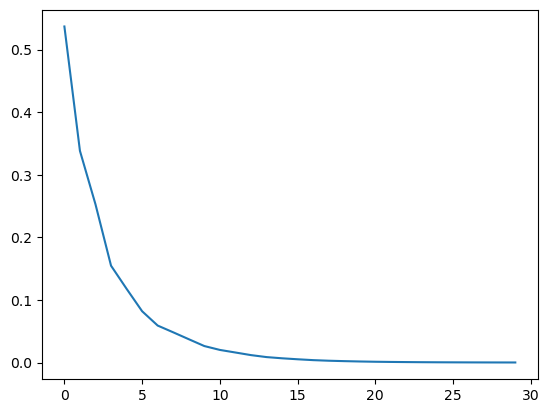

In [14]:
import matplotlib.pyplot as plt
plt.plot(diferencias)

plt.show()

Comparando los resultados obtenido con el metodo iterativo con el obtenido con Gauss Jordan, notamos que cuando t >= 11, ambas probabilidades son iguales, por esto podemos decir que la probabilidad converge con t = 11. Esto se debe a que hay 11 papers por lo que si t > 11, la probabilidad va a seguir siendo la misma por que no van a haber más papers para leer, tomando la probabilidad de t = 11.